In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download(
    "abhishek14398/salary-dataset-simple-linear-regression"
)

path = os.path.join(path, os.listdir(path)[0])

print("Path to dataset files:", path)

c:\Users\Raunak\Projects\Python\practicals\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 457/457 [00:00<00:00, 227kB/s]

Extracting files...
Path to dataset files: C:\Users\Raunak\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1\Salary_dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Simple Linear Regression

In [5]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
df = df.dropna()
df = df.drop_duplicates()

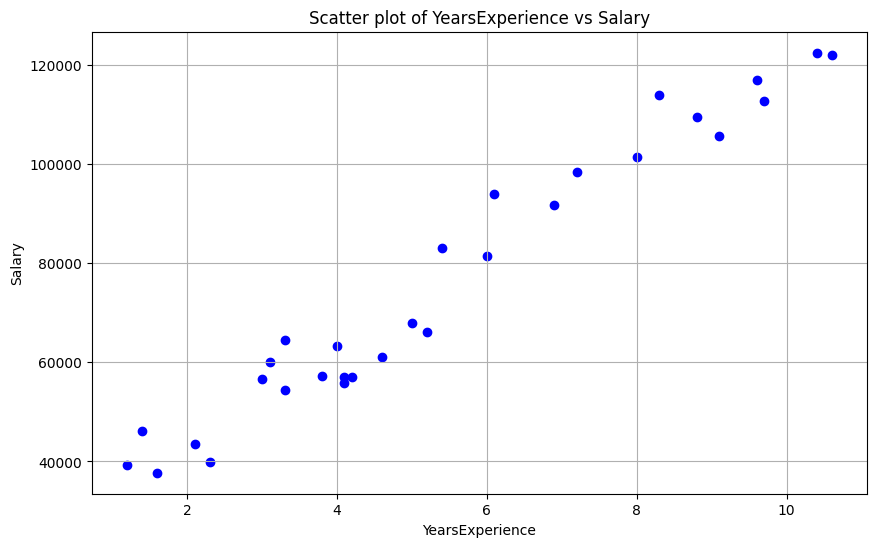

In [ ]:
# Scatter plot of YearsExperience vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(df["YearsExperience"], df["Salary"], color="blue")
plt.title("Scatter plot of YearsExperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.show()

In [ ]:
model = LinearRegression()
smodel = sm.OLS(df["Salary"], sm.add_constant(df["YearsExperience"]))
results = smodel.fit()
model.fit(df[["YearsExperience"]], df["Salary"])

LinearRegression()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.14e-20
Time:                        07:51:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

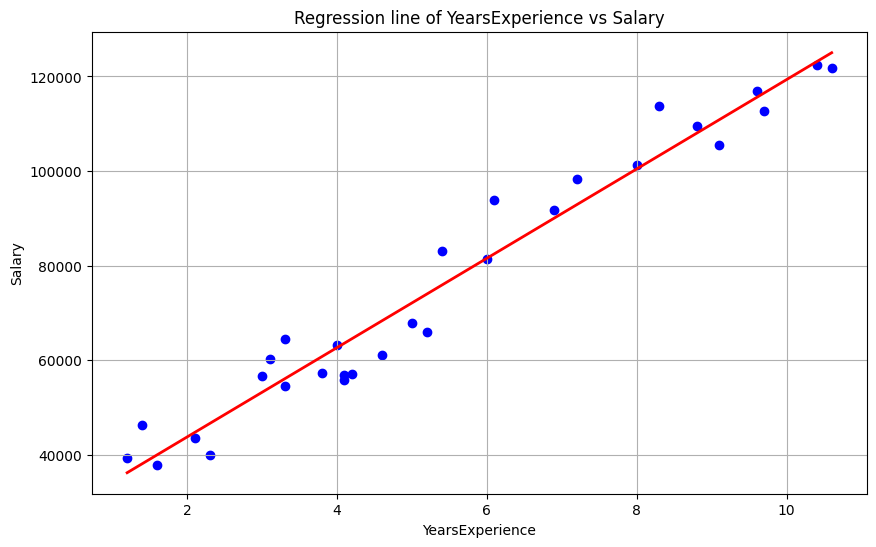

In [ ]:
# Regression line
plt.figure(figsize=(10, 6))
plt.scatter(df["YearsExperience"], df["Salary"], color="blue")
plt.plot(
    df["YearsExperience"],
    model.predict(df[["YearsExperience"]]),
    color="red",
    linewidth=2,
)
plt.title("Regression line of YearsExperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.show()

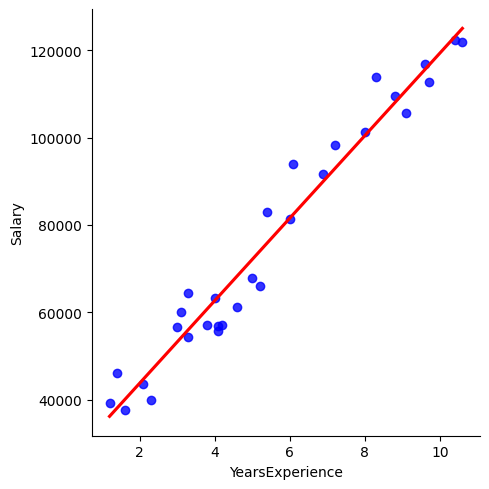

In [ ]:
sns.lmplot(
    x="YearsExperience",
    y="Salary",
    data=df,
    ci=None,
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"},
)
plt.show()

## Multiple Linear Regresssion

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
path = os.path.join(path, os.listdir(path)[0])

print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 155kB/s]

Extracting files...
Path to dataset files: C:\Users\Raunak\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1\Student_Performance.csv


In [17]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])
df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
smodel = sm.OLS(y_train, sm.add_constant(X_train))
results = smodel.fit()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:09:52   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -33.9219      0.143   -237.380      0.000     -34.202     -33.642
Hours Studied                        2.8525      0.009    324.007      0.000       2.835       2.870
Previous Scores                      1.0170      0.001    772.158      0.000       1.014       1.020
Extracurricular Activities           0.6086      0.046     13.321      0.000       0.519       0.698
Sleep Hours                          0.4769      0.013     35.459      0.000       0.451       0.503
Sample Question Papers Practiced     0.1918      0.008     24.027      0.000       0.176       0.207
==============================================================================
Omnibus:                        4.691   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.990
Skew:                           0.019   Prob(JB):                       0.0825
Kurtosis:                       3.116   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 4.082628398521854
Root Mean Squared Error: 2.020551508505006
R-squared: 0.9889832909573145


Text(0.5, 1.0, 'Regression line of Actual vs Predicted')

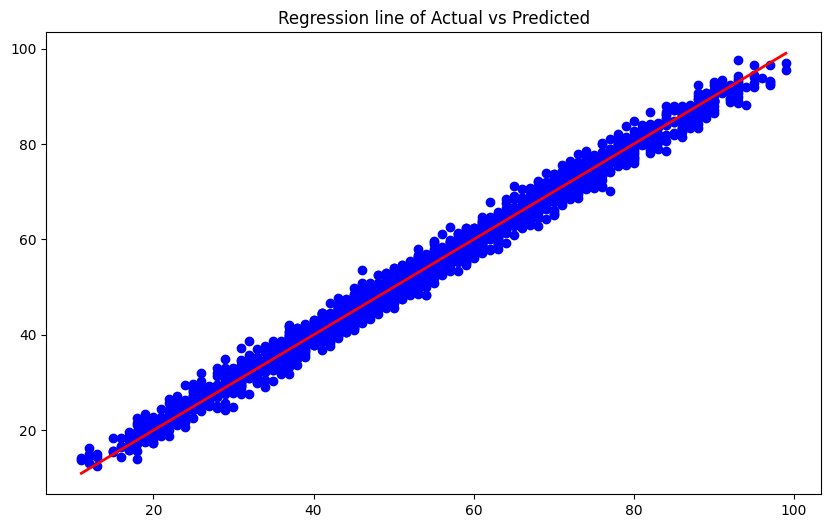

In [34]:
# Regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color="blue")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
)
plt.title("Regression line of Actual vs Predicted")